In [1]:
# install.packages("lme4")
library(lme4)


Warning message:
"package 'lme4' was built under R version 3.6.3"Loading required package: Matrix


In [4]:


df <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/swr_df.csv')
# df <- subset(df,select =- c(Unnamed..0, Unnamed..0.1))

summary(df)

       X           Unnamed..0     Unnamed..0.1   ripple_number 
 Min.   :    0   Min.   :    0   Min.   :    0   Min.   :   0  
 1st Qu.: 4386   1st Qu.: 4386   1st Qu.: 4432   1st Qu.: 179  
 Median : 8772   Median : 8772   Median : 8897   Median : 405  
 Mean   : 8772   Mean   : 8772   Mean   : 8891   Mean   : 584  
 3rd Qu.:13158   3rd Qu.:13158   3rd Qu.:13344   3rd Qu.: 874  
 Max.   :17544   Max.   :17544   Max.   :17822   Max.   :3665  
                                                               
   start_time        end_time        ripple_duration     max_emg       
 Min.   :   0.0   Min.   :   0.239   Min.   :0.0248   Min.   :-0.0709  
 1st Qu.: 717.7   1st Qu.: 717.786   1st Qu.:0.0720   1st Qu.: 0.3016  
 Median :1747.9   Median :1747.918   Median :0.1040   Median : 0.4030  
 Mean   :1779.6   Mean   :1779.701   Mean   :0.1230   Mean   : 0.4449  
 3rd Qu.:2597.7   3rd Qu.:2597.737   3rd Qu.:0.1520   3rd Qu.: 0.5471  
 Max.   :6172.0   Max.   :6172.226   Max.   :0.9864   Ma

In [9]:
mdl_null = lmer(ripple_duration ~ 1 + (1|rat) , data = df)
summary(mdl)

Linear mixed model fit by REML ['lmerMod']
Formula: ripple_duration ~ group + (group | rat)
   Data: df

REML criterion at convergence: -40114.4

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9407 -0.6286 -0.2131  0.3682 11.0690 

Random effects:
 Groups   Name        Variance  Std.Dev. Corr
 rat      (Intercept) 0.0005770 0.02402      
          grouppae    0.0003824 0.01955  0.70
 Residual             0.0059301 0.07701      
Number of obs: 17545, groups:  rat, 12

Fixed effects:
             Estimate Std. Error t value
(Intercept)  0.144819   0.010850  13.347
grouppae    -0.001155   0.019837  -0.058

Correlation of Fixed Effects:
         (Intr)
grouppae -0.547

In [10]:
mdl = lmer(ripple_duration ~ group + (1|rat) , data = df)
summary(mdl)

Linear mixed model fit by REML ['lmerMod']
Formula: ripple_duration ~ group + (1 | rat)
   Data: df

REML criterion at convergence: -40113.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.9376 -0.6285 -0.2130  0.3681 11.0692 

Random effects:
 Groups   Name        Variance Std.Dev.
 rat      (Intercept) 0.001171 0.03423 
 Residual             0.005930 0.07701 
Number of obs: 17545, groups:  rat, 12

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.14617    0.01488   9.826
grouppae    -0.00279    0.02056  -0.136

Correlation of Fixed Effects:
         (Intr)
grouppae -0.724

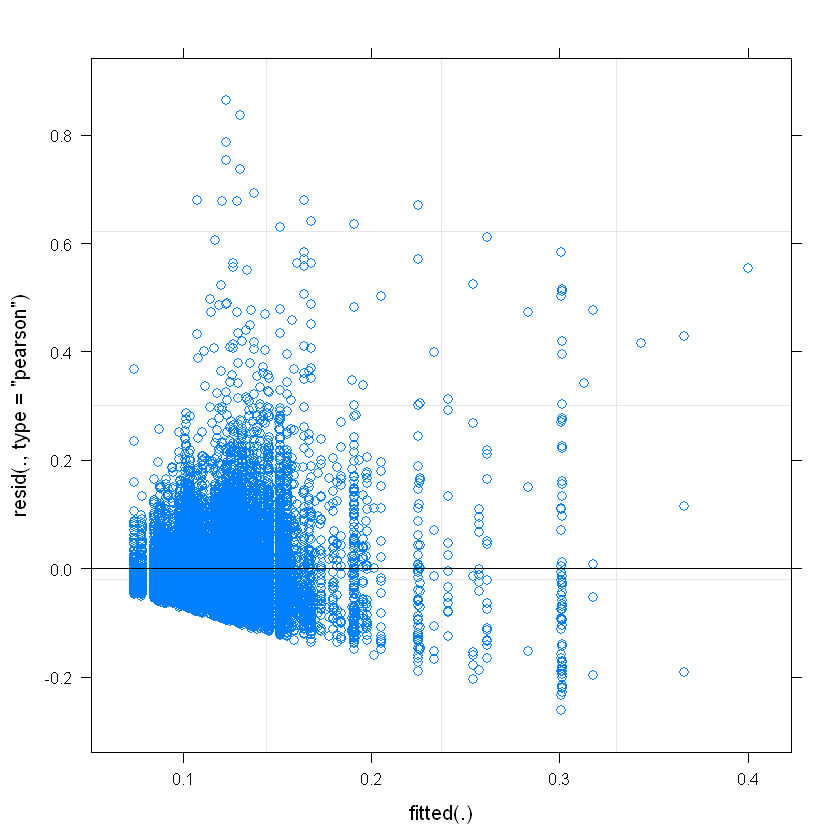

In [5]:
plot(mdl)

In [25]:
mdl_1 = lmer(ripple_duration ~ group + (1|rat/session) , data = df)
mdl_2 = lmer(ripple_duration ~ group + (1|rat) , data = df)

anova(mdl_1,mdl_2,refit=TRUE)

refitting model(s) with ML (instead of REML)


,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
mdl_2,4,-39736.6,-39705.54,19872.30,-39744.6,NA,NA,NA
mdl_1,5,-40571.3,-40532.47,20290.65,-40581.3,836.6937,1,5.680905e-184


In [26]:
anova(mdl_1,mdl_2,refit=FALSE)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
mdl_2,4,-39724.87,-39693.80,19866.43,-39732.87,NA,NA,NA
mdl_1,5,-40559.25,-40520.42,20284.63,-40569.25,836.3858,1,6.6276e-184


In [43]:
# install.packages("car")

library("car")
mdl_full = lmer(peak_freq ~ group + (1|rat) , data = df, REML=FALSE)
# summary(mdl_1)
# Anova(mdl_1)

In [44]:
mdl_null = lmer(peak_freq ~ (1|rat) , data = df, REML=FALSE)



In [45]:
anova(mdl_null,mdl_full)

,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
mdl_null,3,167169.1,167192.4,-83581.56,167163.1,NA,NA,NA
mdl_full,4,167170.4,167201.5,-83581.19,167162.4,0.7359491,1,0.3909616


In [ ]:
df_ripple_rate <- read.csv('F:/Projects/PAE_PlaceCell/analysis/swr_data/post_processed/df_ripple_rate.csv')
df_ripple_rate

### get cliff's delta effect size with confidence

In [7]:

library(rcompanion)

print('ripple_duration')
cliffDelta(ripple_duration~group,data=df,ci=TRUE)

print('peak_freq')
cliffDelta(peak_freq~group,data=df,ci=TRUE)

print('peak_amplitude')
cliffDelta(peak_amplitude~group,data=df,ci=TRUE)

print('ripple_rate')
cliffDelta(ripple_rate~group,data=df_ripple_rate,ci=TRUE)



[1] "ripple_duration"


Cliff.delta,lower.ci,upper.ci
0.187,0.171,0.204


[1] "peak_freq"


Cliff.delta,lower.ci,upper.ci
-0.314,-0.331,-0.298


[1] "peak_amplitude"


Cliff.delta,lower.ci,upper.ci
0.11,0.0917,0.128


[1] "ripple_rate"


Cliff.delta,lower.ci,upper.ci
-0.00413,-0.185,0.172


### get median differences

In [8]:

median(df$ripple_duration[df$group=='control']) - median(df$ripple_duration[df$group=='pae'])

median(df$peak_freq[df$group=='control']) - median(df$peak_freq[df$group=='pae'])

median(df$peak_amplitude[df$group=='control']) - median(df$peak_amplitude[df$group=='pae'])

median(df_ripple_rate$ripple_rate[df_ripple_rate$group=='control']) - median(df_ripple_rate$ripple_rate[df_ripple_rate$group=='pae'])

[1] 0.02

[1] -31.83598

[1] 0.3313085

[1] -0.002799016